In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input tensor
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(10):  # Number of epochs
    for batch_idx, (data, target) in enumerate(train_loader):
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(data)
        # Compute loss
        loss = criterion(output, target)
        # Backward pass
        loss.backward()
        # Update weights
        optimizer.step()
        
    print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

print('Training complete')


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:15<00:00, 639835.96it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 109595.21it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:02<00:00, 782042.26it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 2235452.80it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch 1, Loss: 0.46753957867622375
Epoch 2, Loss: 0.4064740240573883
Epoch 3, Loss: 0.3946292996406555
Epoch 4, Loss: 0.29411908984184265
Epoch 5, Loss: 0.3719021677970886
Epoch 6, Loss: 0.2544739544391632
Epoch 7, Loss: 0.19001847505569458
Epoch 8, Loss: 0.23066812753677368
Epoch 9, Loss: 0.22075007855892181
Epoch 10, Loss: 0.274408221244812
Training complete


In [3]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
print(train_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [5]:
train_dataset[1]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

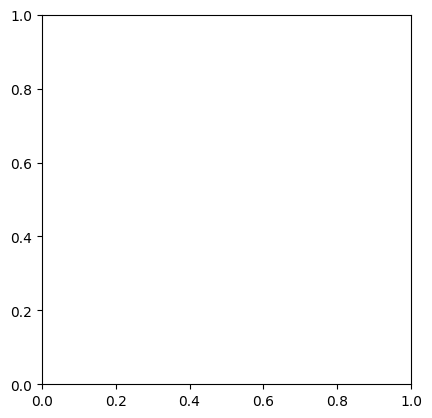

In [6]:
import matplotlib.pyplot as plt
plt.show(train_dataset[1])

ValueError: Input could not be cast to an at-least-1D NumPy array

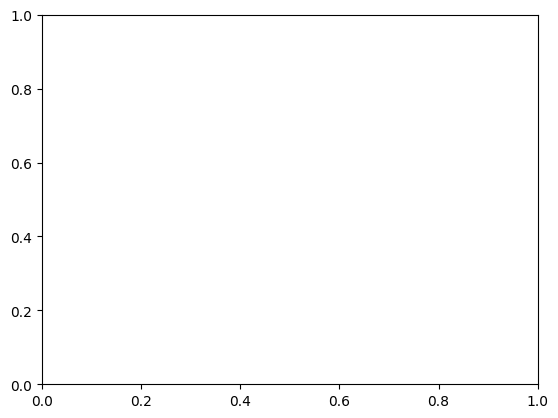

In [9]:
plt.plot(train_dataset)

In [15]:
def show_images(images, labels):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 12))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].numpy().squeeze(), cmap='gray')
        ax.set_title(f'Label: {labels[i].item()}')
        ax.axis('off')
    plt.show()

labels = [1,2,3,4,5]
show_images(train_dataset[:5],labels[:5])

ValueError: only one element tensors can be converted to Python scalars

In [11]:
# data_iter = iter(train_loader)
# images, labels = data_iter.next()
# show_images(images[:5], labels[:5])  # Show first 5 images and labels from the batch


AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'